In [16]:
install.packages('simmer')
install.packages('simmer.plot')
install.packages('dplyr')

Installing package into 'C:/Users/karth/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'simmer' is in use and will not be installed"Installing package into 'C:/Users/karth/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'lattice', 'brew', 'nlme', 'Matrix', 'plyr', 'yaml', 'hms', 'clipr', 'XML', 'Rook', 'gridExtra', 'colorspace', 'gtable', 'lazyeval', 'MASS', 'mgcv', 'reshape2', 'viridisLite', 'withr', 'downloader', 'htmlwidgets', 'igraph', 'influenceR', 'RColorBrewer', 'readr', 'rstudioapi', 'rgexf', 'stringr', 'viridis', 'visNetwork', 'stringi', 'lifecycle', 'farver', 'labeling', 'munsell', 'ggplot2', 'DiagrammeR', 'tidyr', 'scales'



package 'lattice' successfully unpacked and MD5 sums checked
package 'brew' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'Rook' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 su

Installing package into 'C:/Users/karth/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"

In [17]:
library(simmer)
library(dplyr)
library(magrittr)
library(simmer.plot)

Warning message:
"package 'simmer.plot' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'simmer.plot'

The following objects are masked from 'package:simmer':

    get_mon_arrivals, get_mon_attributes, get_mon_resources



In [9]:
sample(x=seq(100,1000),size = 100) %>% 
rnorm(mean=15,sd=3) %>% 
mean()

[1] 15.29659

# Setup Simmer environment

In [10]:
env  <- simmer('Patient Clinic')
env

simmer environment: Patient Clinic | now: 0 | next: 
{ Monitor: in memory }

# Setup Simmer trajector (process flow)
Patient will go from nurse -> doctor -> administrator

In [12]:
patient  <- trajectory("Patient path/Process flow") %>% 

seize('nurse',1) %>% 
timeout(function() rnorm(1,15)) %>% 
release('nurse',1) %>% 
        
seize('doctor',1) %>% 
timeout(function() rnorm(1,15)) %>% 
release('doctor',1) %>% 
        
seize('admin',1) %>% 
timeout(function() rnorm(1,20)) %>% 
release('admin',1)
        
patient

trajectory: Patient path/Process flow, 9 activities
{ Activity: Seize        | resource: nurse, amount: 1 }
{ Activity: Timeout      | delay: function() }
{ Activity: Release      | resource: nurse, amount: 1 }
{ Activity: Seize        | resource: doctor, amount: 1 }
{ Activity: Timeout      | delay: function() }
{ Activity: Release      | resource: doctor, amount: 1 }
{ Activity: Seize        | resource: admin, amount: 1 }
{ Activity: Timeout      | delay: function() }
{ Activity: Release      | resource: admin, amount: 1 }

# Add resources to Simmer environment
## Add patient inter arrival as a generator to Simmer

In [13]:
env %>% 
add_resource("nurse",2) %>% 
add_resource("doctor",3) %>% 
add_resource("admin",3) %>% 
add_generator("patient",patient,function() rnorm(1,5,0.5))
              
env

simmer environment: Patient Clinic | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 0(2) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Source: patient | monitored: 1 | n_generated: 0 }

simmer environment: Patient Clinic | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 0(2) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Source: patient | monitored: 1 | n_generated: 0 }

In [14]:
env %>% run(until=540)

simmer environment: Patient Clinic | now: 540 | next: 541.300001658255
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 2(2) | queue status: 34(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 2(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 3(3) | queue status: 0(Inf) }
{ Source: patient | monitored: 1 | n_generated: 107 }

Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_resources(x))' instead.
See help("Deprecated")"Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_arrivals(x))' instead.
See help("Deprecated")"`geom_smooth()` using method = 'loess' and formula 'y ~ x'


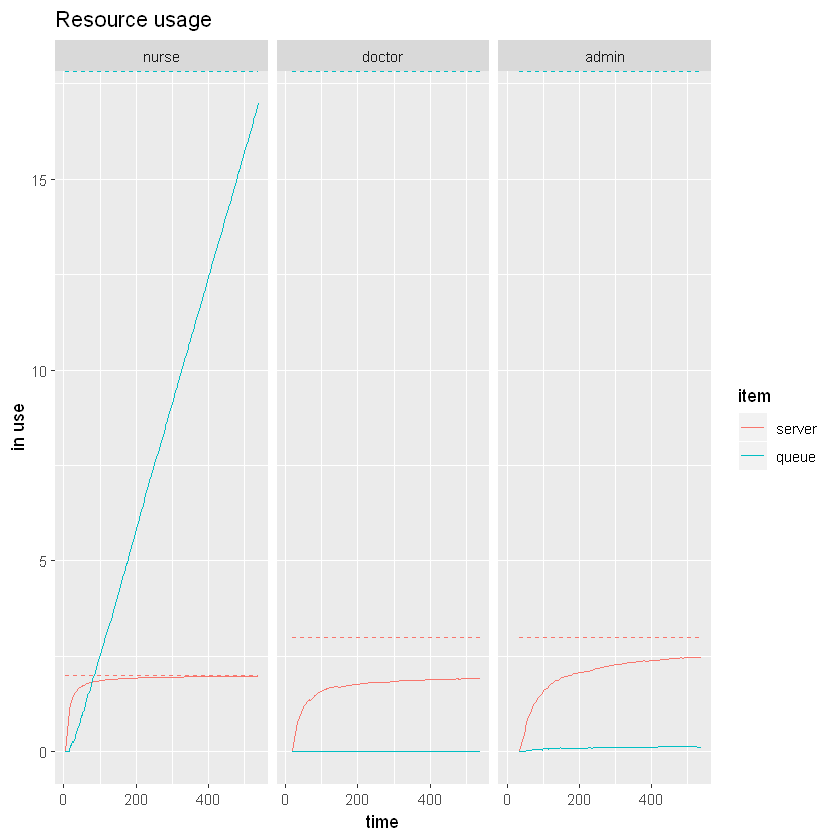

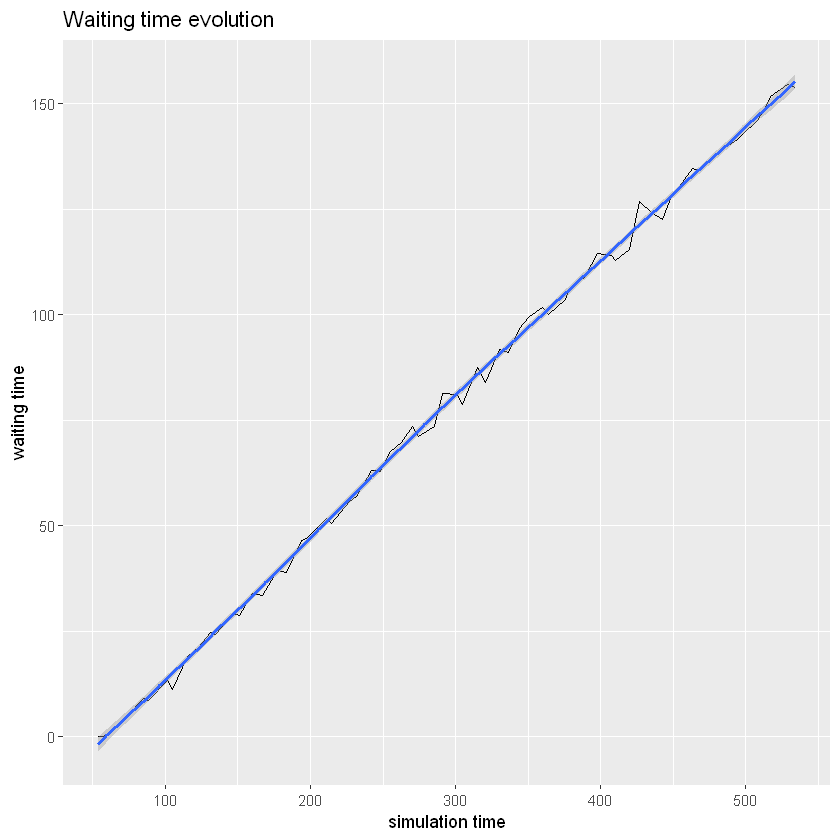

In [19]:
plot(env,what='resources',metric="usage",c("nurse","doctor","admin"),items=c("server","queue"))
plot(env,what="arrivals",metric="waiting_time")

# Scenario-2 : Adding a nurse and then simulating

simmer environment: Patient Clinic | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Source: patient | monitored: 1 | n_generated: 0 }

simmer environment: Patient Clinic | now: 540 | next: 541.82066893694
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 3(3) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 3(3) | queue status: 1(Inf) }
{ Resource: admin | monitored: TRUE | server status: 3(3) | queue status: 24(Inf) }
{ Source: patient | monitored: 1 | n_generated: 108 }

Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_resources(x))' instead.
See help("Deprecated")"Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_arrivals(x))' instead.
See help("Deprecated")"`geom_smooth()` using method = 'loess' and formula 'y ~ x'


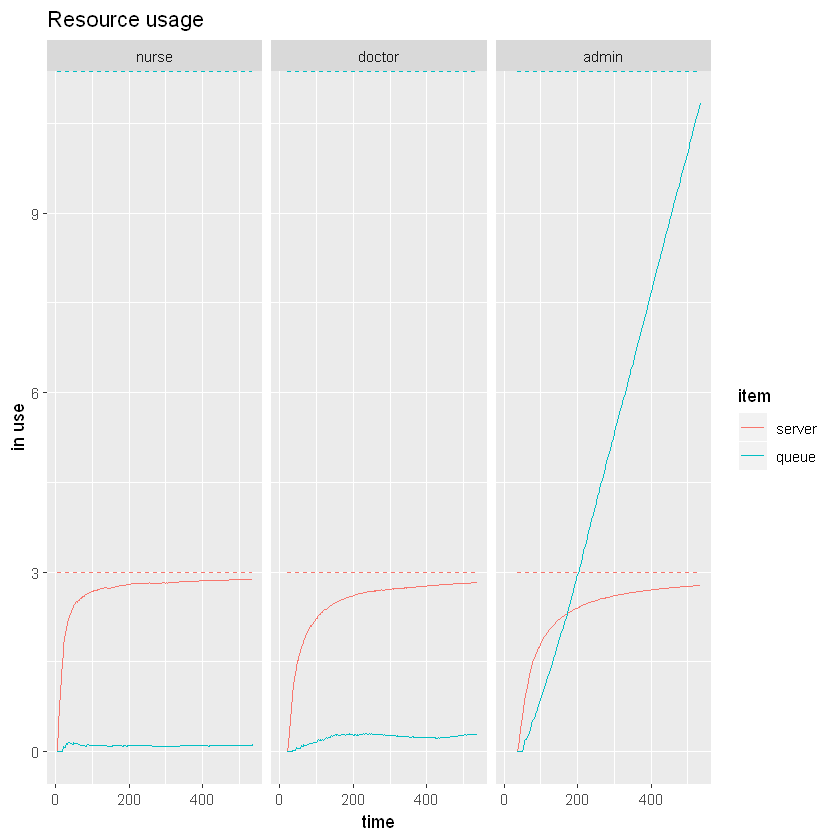

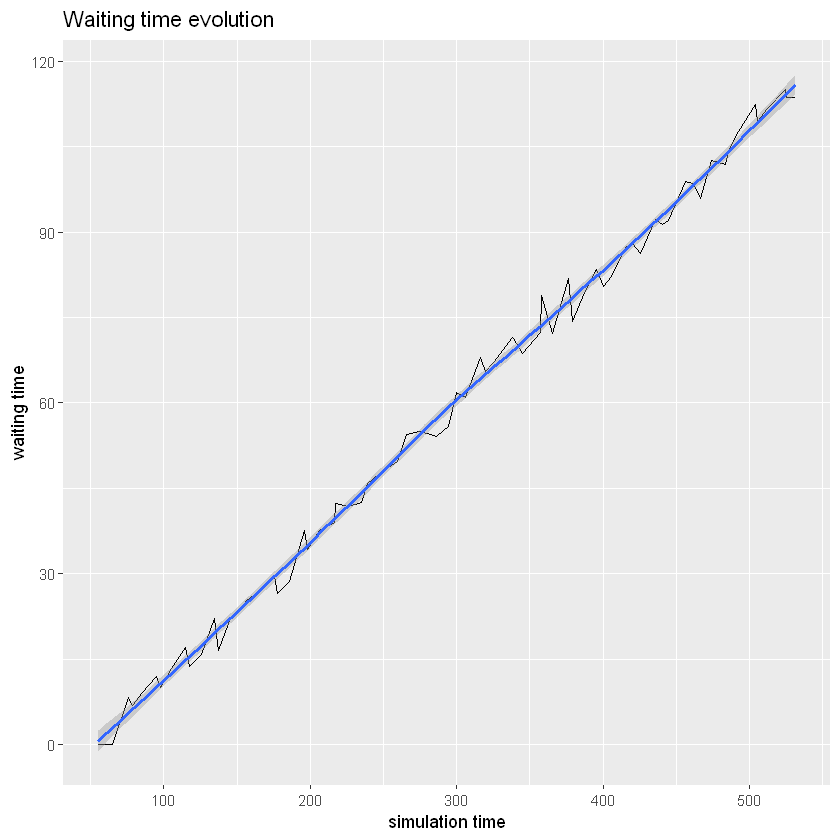

In [34]:
env  <- simmer('Patient Clinic')
env %>% 
add_resource("nurse",3,mon=TRUE) %>%  ##Incrased nurses from 2 to 3
add_resource("doctor",3,mon=TRUE) %>% 
add_resource("admin",3,mon=TRUE) %>% 
add_generator("patient",patient,function() rnorm(1,5,0.5))
              
env  %>% run(until=540)
              
plot(env,what='resources',metric="usage",c("nurse","doctor","admin"),items=c("server","queue"))
plot(env,what="arrivals",metric="waiting_time")

# Scenario -3: Increasing admins from 3 to 4 and simulate

simmer environment: Patient Clinic | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 0(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 0(4) | queue status: 0(Inf) }
{ Source: patient | monitored: 1 | n_generated: 0 }

simmer environment: Patient Clinic | now: 540 | next: 542.715399570493
{ Monitor: in memory }
{ Resource: nurse | monitored: TRUE | server status: 3(3) | queue status: 0(Inf) }
{ Resource: doctor | monitored: TRUE | server status: 3(3) | queue status: 0(Inf) }
{ Resource: admin | monitored: TRUE | server status: 4(4) | queue status: 1(Inf) }
{ Source: patient | monitored: 1 | n_generated: 109 }

Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_resources(x))' instead.
See help("Deprecated")"Warning message:
"'plot.simmer' is deprecated.
Use 'plot(get_mon_arrivals(x))' instead.
See help("Deprecated")"`geom_smooth()` using method = 'loess' and formula 'y ~ x'


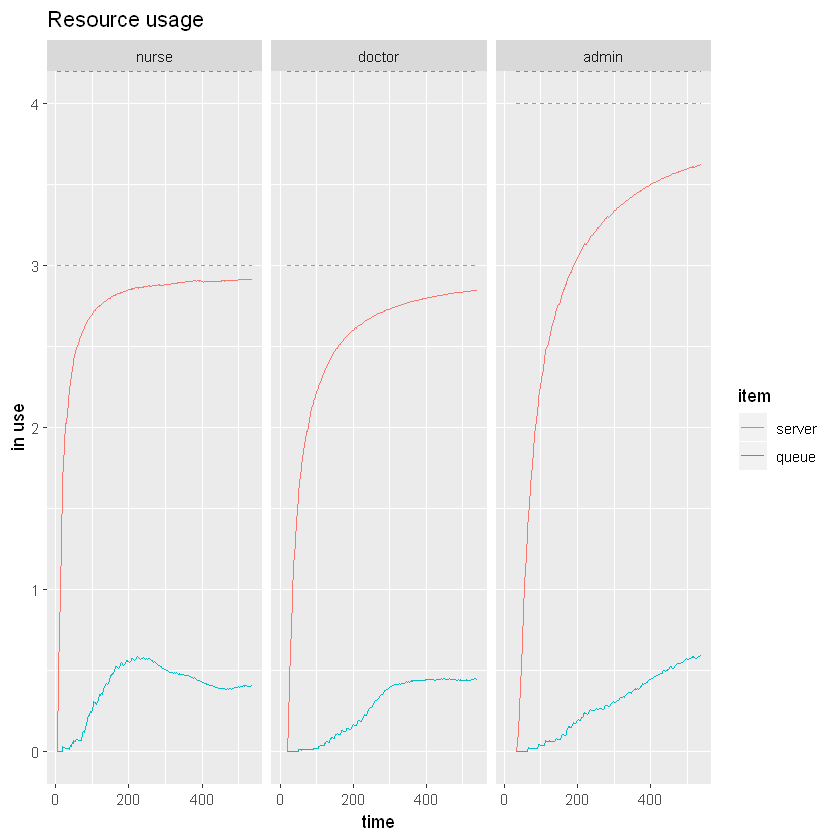

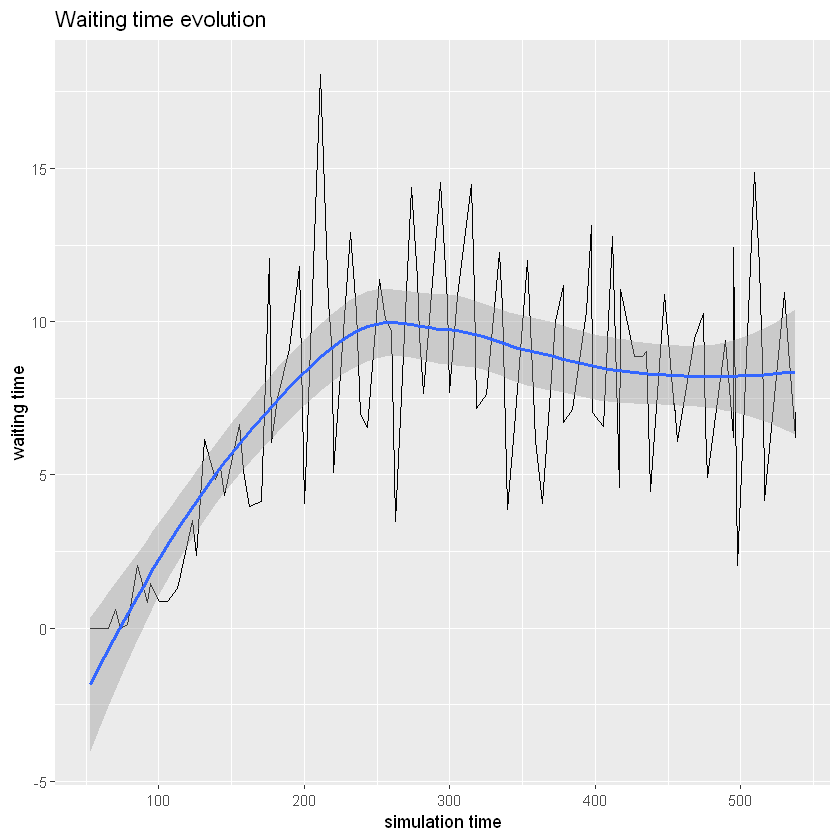

In [35]:
env  <- simmer('Patient Clinic')
env %>% 
add_resource("nurse",3,mon=TRUE) %>%  ##Incrased nurses from 2 to 3
add_resource("doctor",3,mon=TRUE) %>% 
add_resource("admin",4,mon=TRUE) %>% 
add_generator("patient",patient,function() rnorm(1,5,0.5))
              
env  %>% run(until=540)
              
plot(env,what='resources',metric="usage",c("nurse","doctor","admin"),items=c("server","queue"))
plot(env,what="arrivals",metric="waiting_time")